In [1]:
from google.colab import files
uploaded = files.upload()

Saving Covid_19_data_TM_JE.csv to Covid_19_data_TM_JE.csv


In [2]:
import pandas as pd
data = pd.read_csv('Covid_19_data_TM_JE.csv', delimiter=',')
data.head()

positive  negative  ...  tests_per_pop  deaths
0       185      6099  ...       0.008561       6
1      1796     11282  ...       0.002664      45
2       830     10412  ...       0.003699      16
3      2269     25141  ...       0.003715      64
4     13438    103095  ...       0.002918     319

[5 rows x 7 columns]

In [3]:
import numpy as np
dataset = np.genfromtxt('Covid_19_data_TM_JE.csv', delimiter=",", skip_header = True)
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format}) 
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(1604, 7)

[[ 185.0  6099.0  0.0  0.0  734002.0  0.0  6.0]
 [ 1796.0  11282.0  0.0  0.0  4908621.0  0.0  45.0]
 [ 830.0  10412.0  39.0  97.0  3038999.0  0.0  16.0]
 [ 2269.0  25141.0  0.0  0.0  7378494.0  0.0  64.0]
 [ 13438.0  103095.0  0.0  0.0  39937489.0  0.0  319.0]]


In [0]:
# Select deafs as the output (Y)
Y = dataset[:, 6] 
# All others as the input (X)
X = dataset[:, [0,1,2,3,4,5]]

In [0]:
# Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std

# Rescaling
Ymax = Y.max()
Y = Y / Ymax

In [6]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

481
1604


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 10, verbose = 0)

{'verbose': 0, 'epochs': 10, 'steps': 36}


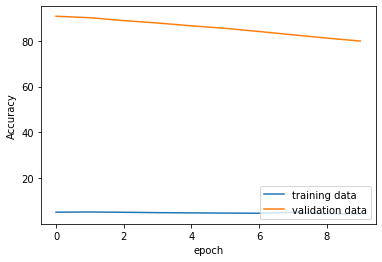

In [40]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [0]:
#above indicates that this model needs more training
#this is an example of underfitting
#the training loss remains flat regardless of training

In [27]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

481
1604


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 2506, verbose = 0)

{'verbose': 0, 'epochs': 2506, 'steps': 36}


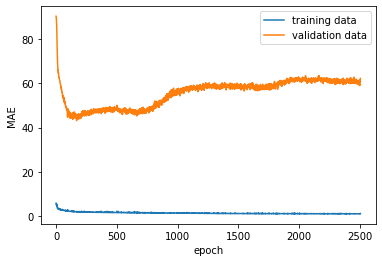

In [38]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
# this appears to be an example of overfitting
# the plot for training loss continues to decrease with experience (albeit not 
#by much because it is so low to begin with)
#the plot of validation loss descreases to a point and begins increasing again

In [91]:
index_30percent = int(0.1 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

160
1604


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 25, verbose = 0)

{'verbose': 0, 'epochs': 25, 'steps': 46}


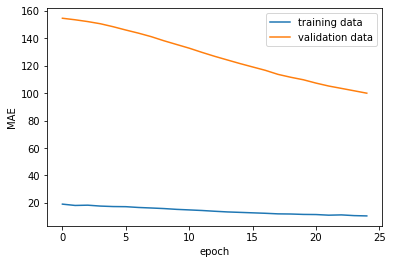

In [93]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
#the above shows too small of a training set at only 10%

In [0]:
index_30percent = int(0.9 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 256, verbose = 0)

In [85]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

{'verbose': 0, 'epochs': 256, 'steps': 36}


In [0]:
# the above shows too small of a validation set

In [86]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
print(int(len(dataset[:, 0])))
# Split into training and validation
XVALID = dataset[:index_30percent, [0, 1, 2, 3, 4, 5]]
YVALID = dataset[:index_30percent, 6]
XTRAIN = dataset[index_30percent:, [0, 1, 2, 3, 4, 5]]
YTRAIN = dataset[index_30percent:, 6]
mean = XTRAIN.mean(axis = 0)
XTRAIN -= mean
std = XTRAIN.std(axis = 0)
XTRAIN /= std
XVALID -= mean
XVALID /= std

481
1604


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim = 6, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mae', optimizer = 'rmsprop', metrics=['mae'])
thing = model.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 500, verbose = 0)

{'verbose': 0, 'epochs': 500, 'steps': 36}


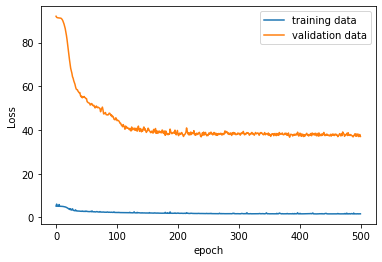

In [90]:
import matplotlib.pyplot as plt
# Check what's in the history
print(thing.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(thing.history['loss']) # replace with accuracy/MAE
plt.plot(thing.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()

In [0]:
# the above shows a good learning curve because
# the plot of training loss decreases to a point of stability
# as does the validation loss

In [0]:
# 5
# the learning curve shown on the activity 13 page appears to be
# an example of underfitting as the curve for the training data
# is decreasing and continues to decrease at the end of the plot